<a href="https://colab.research.google.com/github/elangbijak4/1000startup-Kominfo-UGM/blob/main/Kripto/Akses_data_Kripto_dan_Analisis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching data for BTC-USD...
Fetching data for ETH-USD...
Fetching data for ADA-USD...
Fetching data for SOL-USD...
Fetching data for XRP-USD...
Fetching data for XLM-USD...
Fetching data for HBAR-USD...

Validating data...
BTC-USD: No missing data.
BTC-USD: Found 5754 outliers in Volume.
ETH-USD: No missing data.
ETH-USD: Found 5754 outliers in Volume.
ADA-USD: No missing data.
ADA-USD: Found 5754 outliers in Volume.
SOL-USD: No missing data.
SOL-USD: Found 5754 outliers in Volume.
XRP-USD: No missing data.
XRP-USD: Found 5754 outliers in Volume.
XLM-USD: No missing data.
XLM-USD: Found 5754 outliers in Volume.
HBAR-USD: No missing data.
HBAR-USD: Found 5754 outliers in Volume.

Summary Statistics:

BTC-USD Summary:
Price           Close           High            Low           Open  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count     5754.000000    5754.000000    5754.000000    5754.000000   
mean     97872.648300   98002.273481   97735.423887   97870.277

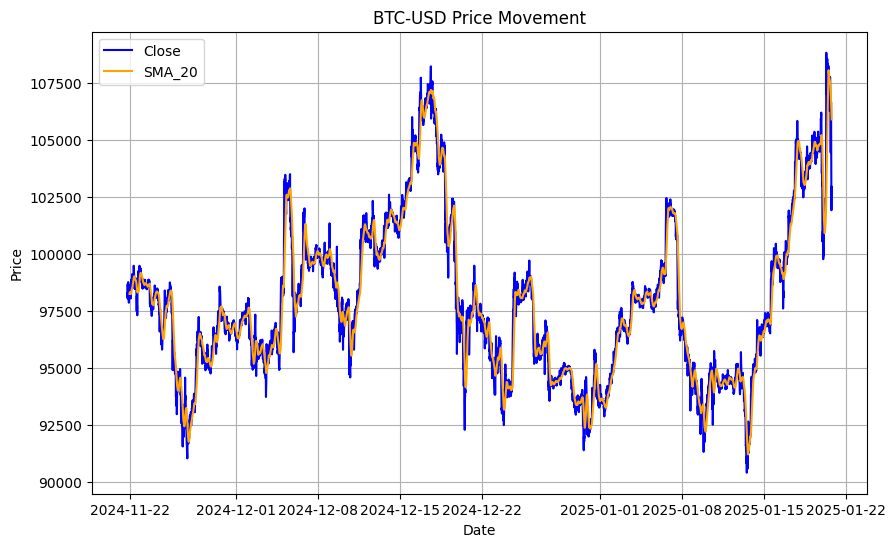

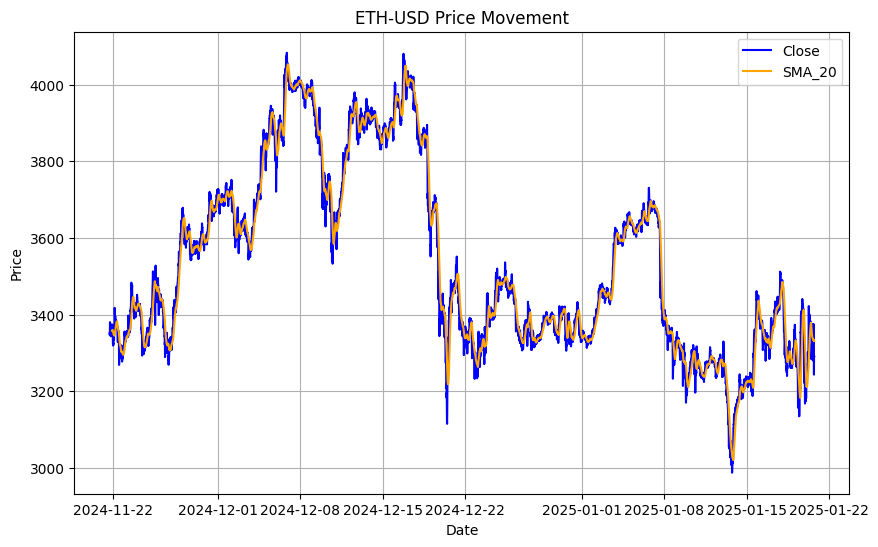

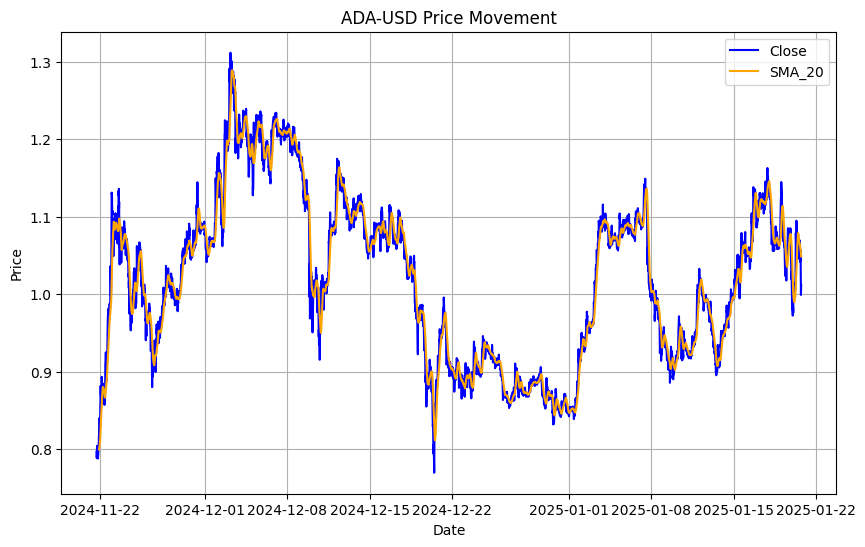

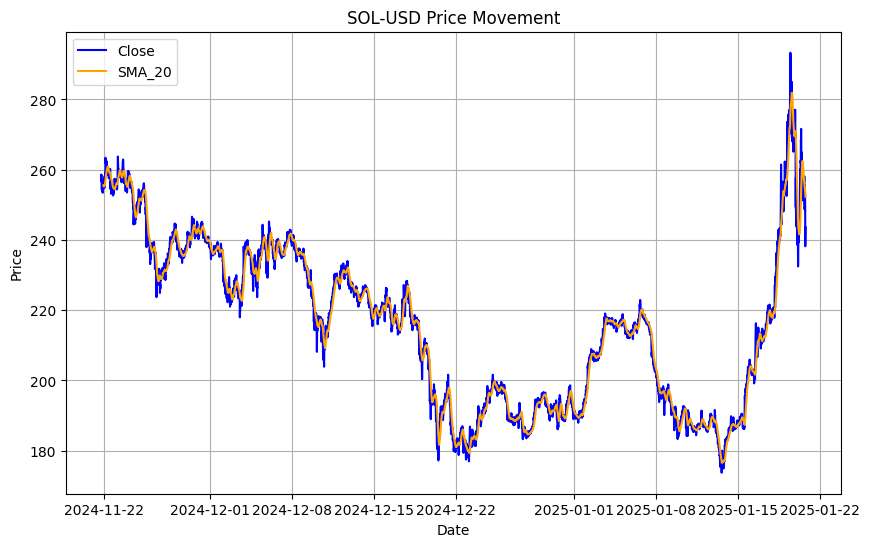

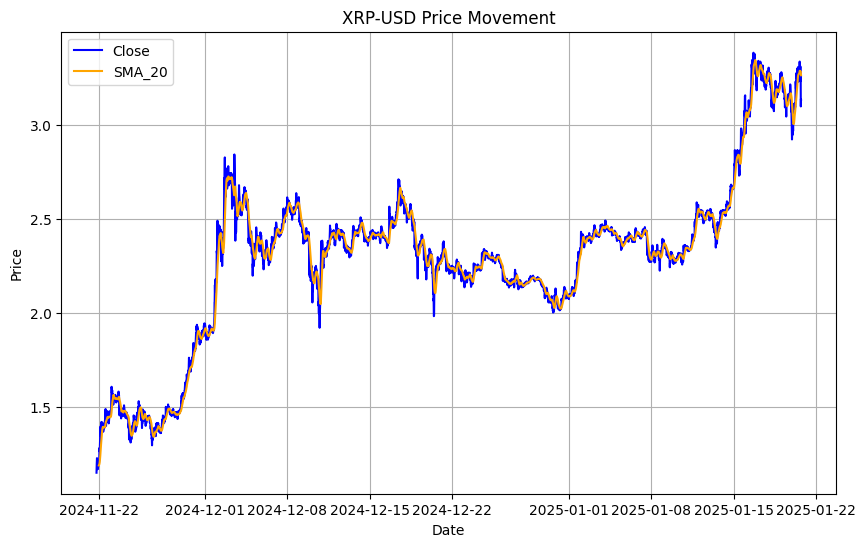

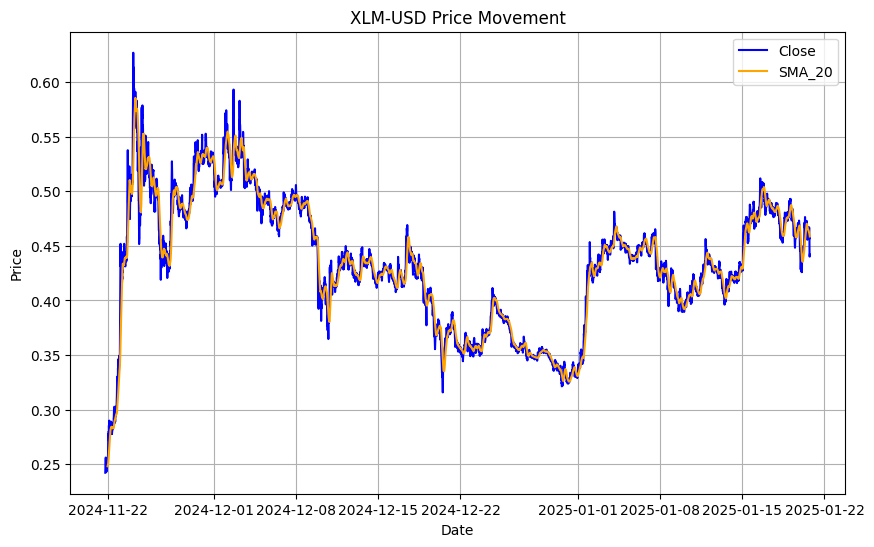

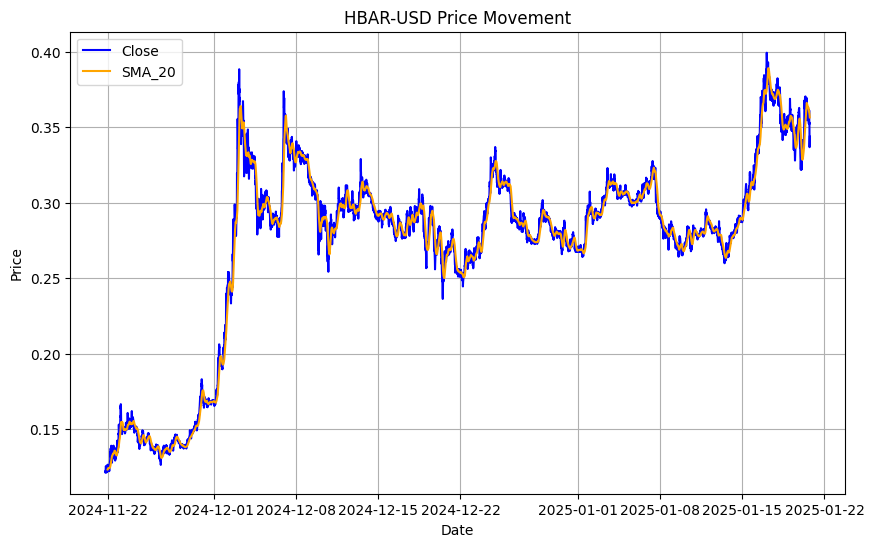

Data for BTC-USD saved to BTC_USD.csv.
Data for ETH-USD saved to ETH_USD.csv.
Data for ADA-USD saved to ADA_USD.csv.
Data for SOL-USD saved to SOL_USD.csv.
Data for XRP-USD saved to XRP_USD.csv.
Data for XLM-USD saved to XLM_USD.csv.
Data for HBAR-USD saved to HBAR_USD.csv.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Daftar simbol kripto
crypto_symbols = ["BTC-USD", "ETH-USD", "ADA-USD", "SOL-USD", "XRP-USD", "XLM-USD", "HBAR-USD"]

# Interval waktu
interval = "15m"

# Fungsi mengambil data
def fetch_crypto_data_yf(symbol, interval):
    try:
        print(f"Fetching data for {symbol}...")
        data = yf.download(tickers=symbol, interval=interval, progress=False)
        if data.empty:
            print(f"No data found for {symbol}.")
            return None
        data.index = data.index.tz_localize(None)  # Hilangkan zona waktu
        data['Ticker'] = symbol  # Tambahkan kolom ticker
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

# Validasi data
def validate_data(data):
    print("\nValidating data...")
    for symbol, df in data.items():
        if df is not None:
            missing_data = df.isnull().sum().sum()
            if missing_data > 0:
                print(f"{symbol}: Missing data found: {missing_data} values.")
            else:
                print(f"{symbol}: No missing data.")
            # Outlier detection
            volume_mean = df['Volume'].mean()
            volume_std = df['Volume'].std()
            outliers = df[df['Volume'] > (volume_mean + 3 * volume_std)]
            if not outliers.empty:
                print(f"{symbol}: Found {len(outliers)} outliers in Volume.")

# Statistik ringkasan
def summarize_data(data):
    print("\nSummary Statistics:")
    summary = {}
    for symbol, df in data.items():
        if df is not None:
            stats = df.describe()
            summary[symbol] = stats
            print(f"\n{symbol} Summary:")
            print(stats)
    return summary

# Analisis teknis
def technical_analysis(data):
    print("\nPerforming Technical Analysis...")
    for symbol, df in data.items():
        if df is not None:
            df['SMA_20'] = df['Close'].rolling(window=20).mean()  # Simple Moving Average
            df['RSI'] = compute_rsi(df['Close'], window=14)  # RSI
            print(f"{symbol}: Added SMA_20 and RSI.")

def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Visualisasi data
def plot_data(data):
    print("\nPlotting data...")
    for symbol, df in data.items():
        if df is not None:
            plt.figure(figsize=(10, 6))

            # Konversi kolom ke format 1D
            close_series = df['Close'].values.flatten()  # Pastikan 1D
            sma_series = df['SMA_20'].values.flatten() if 'SMA_20' in df else None

            # Plot garis harga Close
            sns.lineplot(x=df.index, y=close_series, label="Close", color="blue")

            # Plot garis SMA jika tersedia
            if sma_series is not None:
                sns.lineplot(x=df.index, y=sma_series, label="SMA_20", color="orange")

            plt.title(f"{symbol} Price Movement")
            plt.xlabel("Date")
            plt.ylabel("Price")
            plt.legend()
            plt.grid(True)
            plt.show()

# Dataframe untuk menyimpan hasil
crypto_data = {}

# Ambil data dari yfinance
for symbol in crypto_symbols:
    crypto_data[symbol] = fetch_crypto_data_yf(symbol, interval)

# Validasi data
validate_data(crypto_data)

# Tambahkan statistik ringkasan
summary_stats = summarize_data(crypto_data)

# Lakukan analisis teknis
technical_analysis(crypto_data)

# Visualisasi data
plot_data(crypto_data)

# Simpan data ke CSV
for symbol, data in crypto_data.items():
    if data is not None:
        file_name = f"{symbol.replace('-', '_')}.csv"
        data.to_csv(file_name)
        print(f"Data for {symbol} saved to {file_name}.")